# Plotting of `Population` Objects
This notebook demonstrates some of the functions available in ParetoBench for plotting the data in `Population` objects.

In [1]:
import paretobench as pb
from paretobench.plotting import (
    plot_population_decision_vars,
    plot_population_objectives,
    PopulationObjectivesConfig,
    PopulationDecisionVarsConfig,
)
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load some data to plot
exp = pb.Experiment.load("data/for_plotting.h5")

## Plotting the Objectives
The following cell demonstrates a few options for plotting the objectives from a population object.

Text(0.5, 1.0, 'Specify Pareto Front Manually')

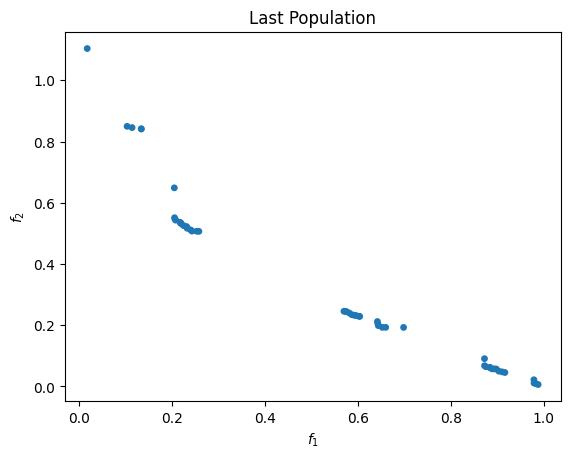

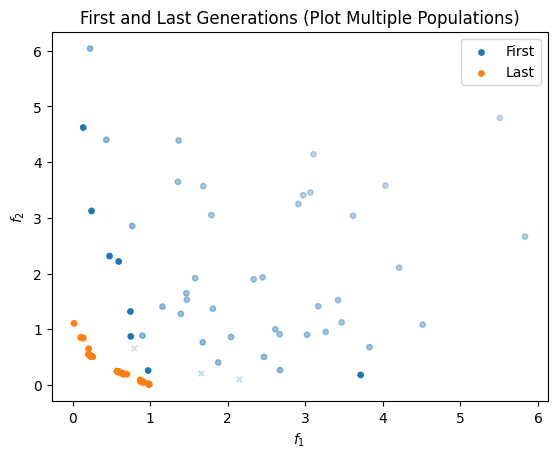

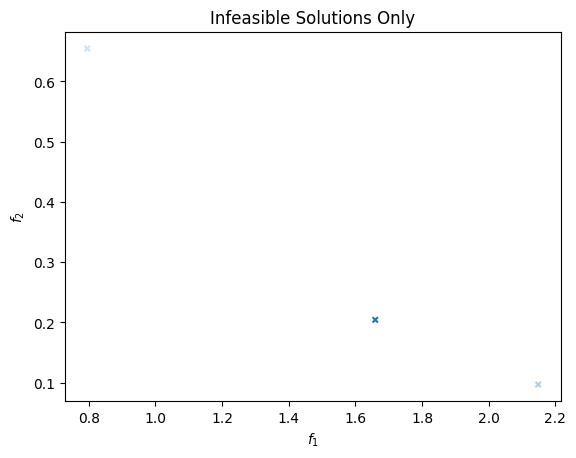

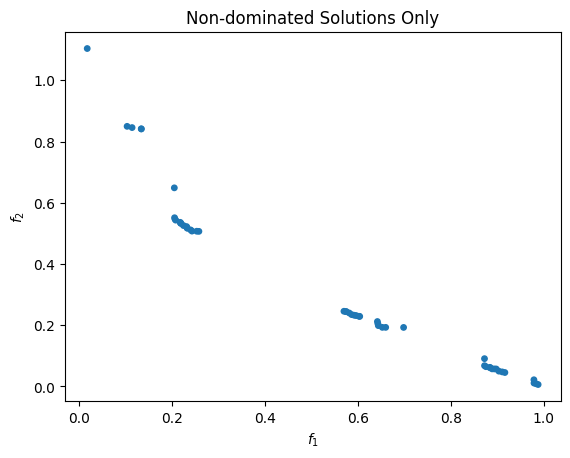

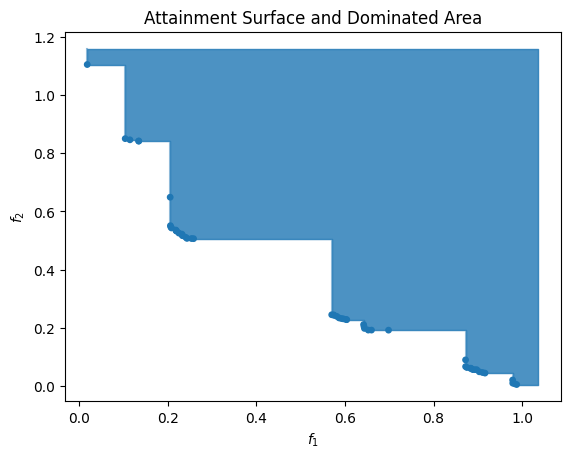

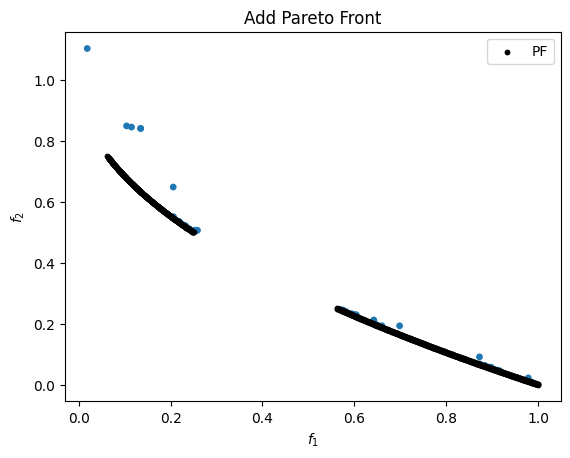

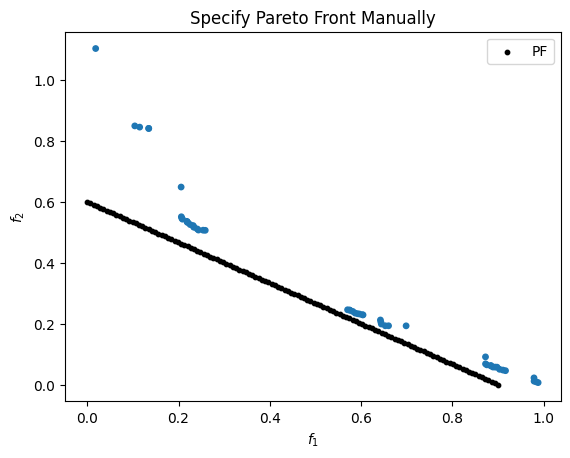

In [3]:
# Get the final generation from one of the runs
idx = 0
first_pop = exp.runs[idx].reports[0]
last_pop = exp.runs[idx].reports[-1]

# Plot the objectives with default parameters. The dominated solutions are
# shown with some transparency to distinguish them
plot_population_objectives(last_pop)
plt.title("Last Population")

# Plot the first generation to demonstrate what infeasible solutions look like and show multiple plotting
fig, ax = plot_population_objectives(first_pop, settings=PopulationObjectivesConfig(label="First"))
plot_population_objectives(last_pop, fig, ax, settings=PopulationObjectivesConfig(label="Last"))
plt.title("First and Last Generations (Plot Multiple Populations)")
plt.legend()

# Show off the infeasible solutions
plot_population_objectives(first_pop, settings=PopulationObjectivesConfig(plot_feasible="infeasible"))
plt.title("Infeasible Solutions Only")

# Don't plot the dominated solutions
plot_population_objectives(last_pop, settings=PopulationObjectivesConfig(plot_dominated="non-dominated"))
plt.title("Non-dominated Solutions Only")

# Add the attainment surface
plot_population_objectives(
    last_pop, settings=PopulationObjectivesConfig(plot_attainment=True, plot_dominated_area=True)
)
plt.title("Attainment Surface and Dominated Area")

# Let's add the analytical Pareto front to it
plot_population_objectives(last_pop, settings=PopulationObjectivesConfig(problem=exp.runs[idx].problem))
plt.title("Add Pareto Front")

# Can also manually specify the objecitves if not using a standard problem
pf = np.column_stack((np.linspace(0, 0.9, 128), np.linspace(0.6, 0, 128)))
plot_population_objectives(last_pop, settings=PopulationObjectivesConfig(pf_objectives=pf))
plt.title("Specify Pareto Front Manually")

CPU times: user 739 ms, sys: 2.06 ms, total: 741 ms
Wall time: 740 ms


Text(0.5, 0.92, 'Attainment Surface')

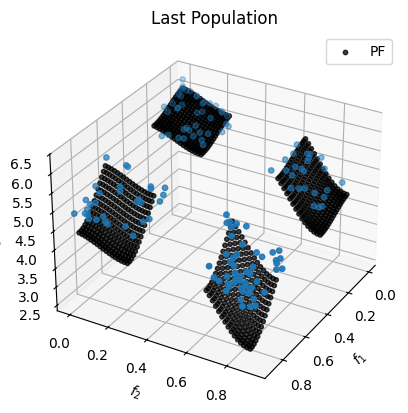

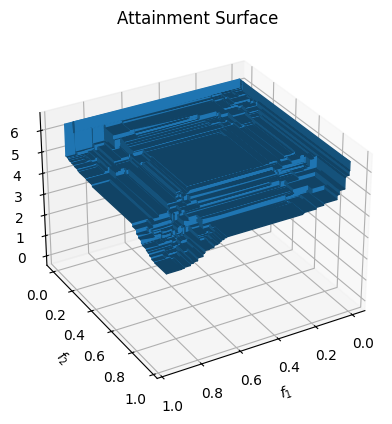

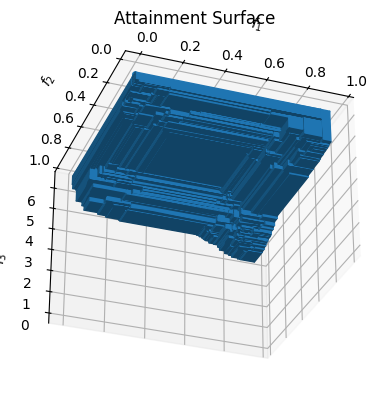

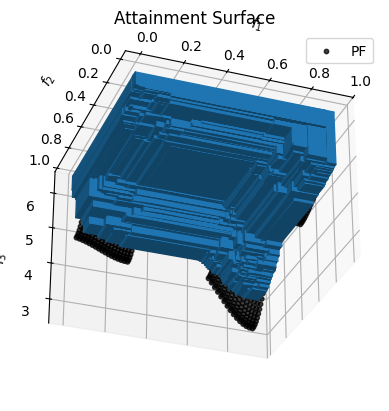

In [4]:
%%time
# Get the final generation from one of the runs
last_pop = exp.runs[1].reports[-1]

# Plot the objectives with default parameters. The dominated solutions are
# shown with some transparency to distinguish them
fig, ax = plot_population_objectives(last_pop, settings=PopulationObjectivesConfig(problem=exp.runs[1].problem))
ax.view_init(30, 30)
plt.title("Last Population")

# Get the final generation from one of the runs
last_pop = exp.runs[1].reports[-1]

# Plot the attainment surface
fig, ax = plot_population_objectives(last_pop, settings=PopulationObjectivesConfig(plot_attainment=True))
ax.view_init(30, 60)
plt.title("Attainment Surface")

# Another angle
fig, ax = plot_population_objectives(last_pop, settings=PopulationObjectivesConfig(plot_attainment=True))
ax.view_init(-30, 250)
plt.title("Attainment Surface")

# Show in reference to the PF
fig, ax = plot_population_objectives(
    last_pop, settings=PopulationObjectivesConfig(problem=exp.runs[1].problem, plot_attainment=True)
)
ax.view_init(-30, 250)
plt.title("Attainment Surface")

## Decision Variables
This cell shows the creation of a pair plot of the decision variables.

Text(0.5, 0.98, 'Remove Dominated Individuals')

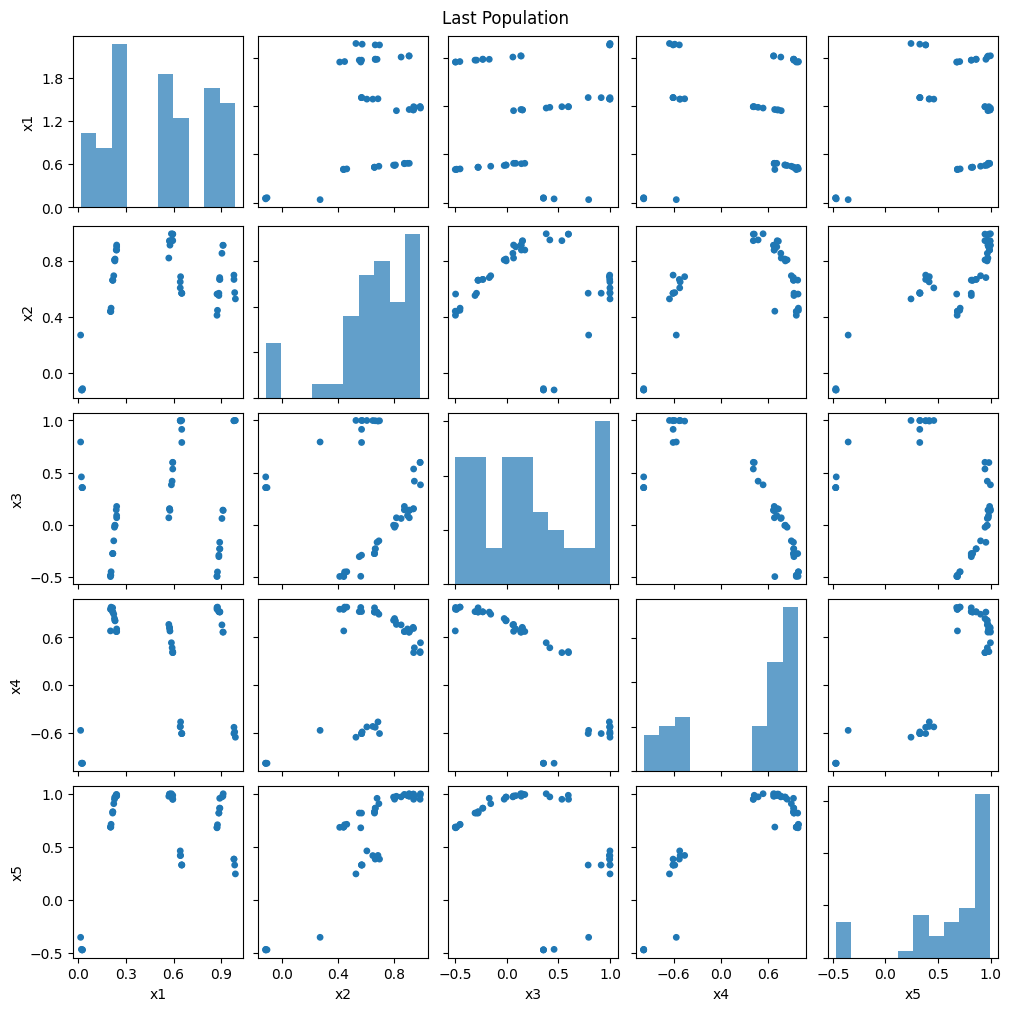

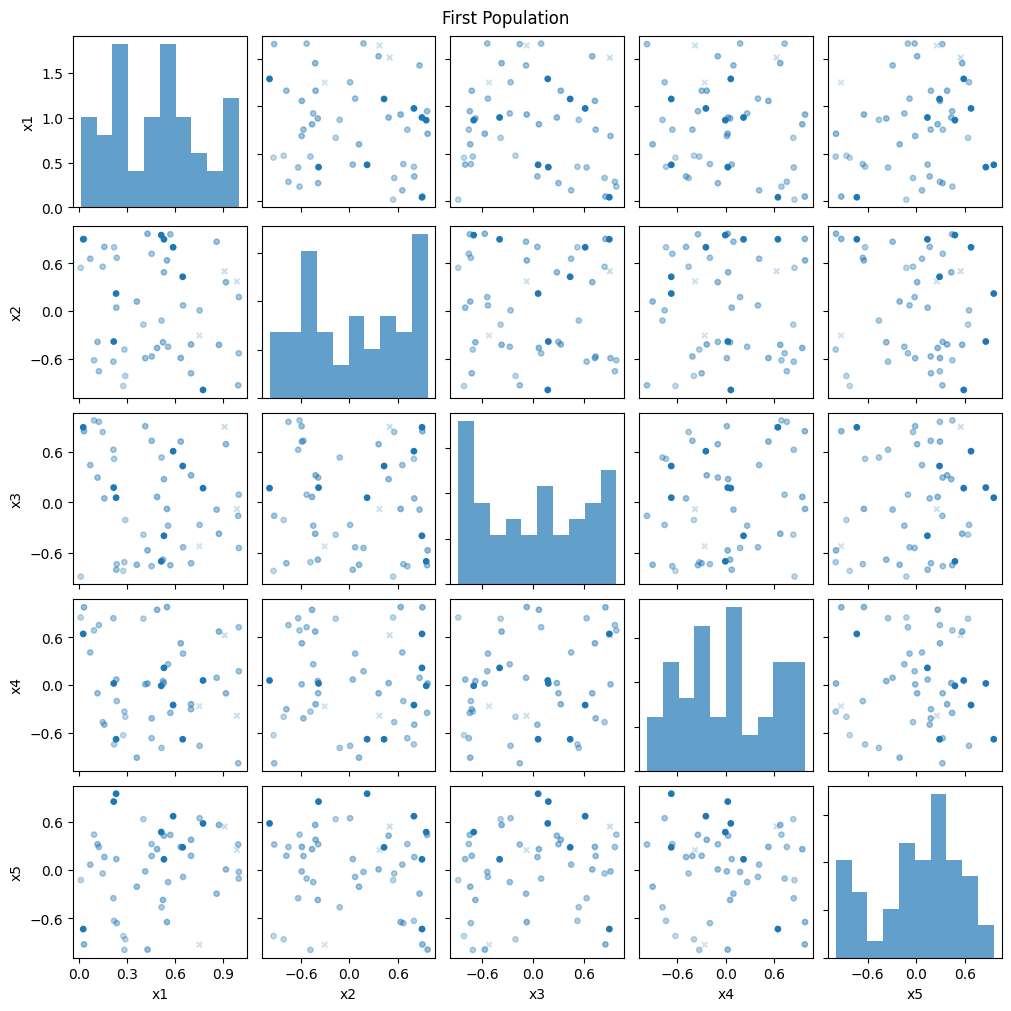

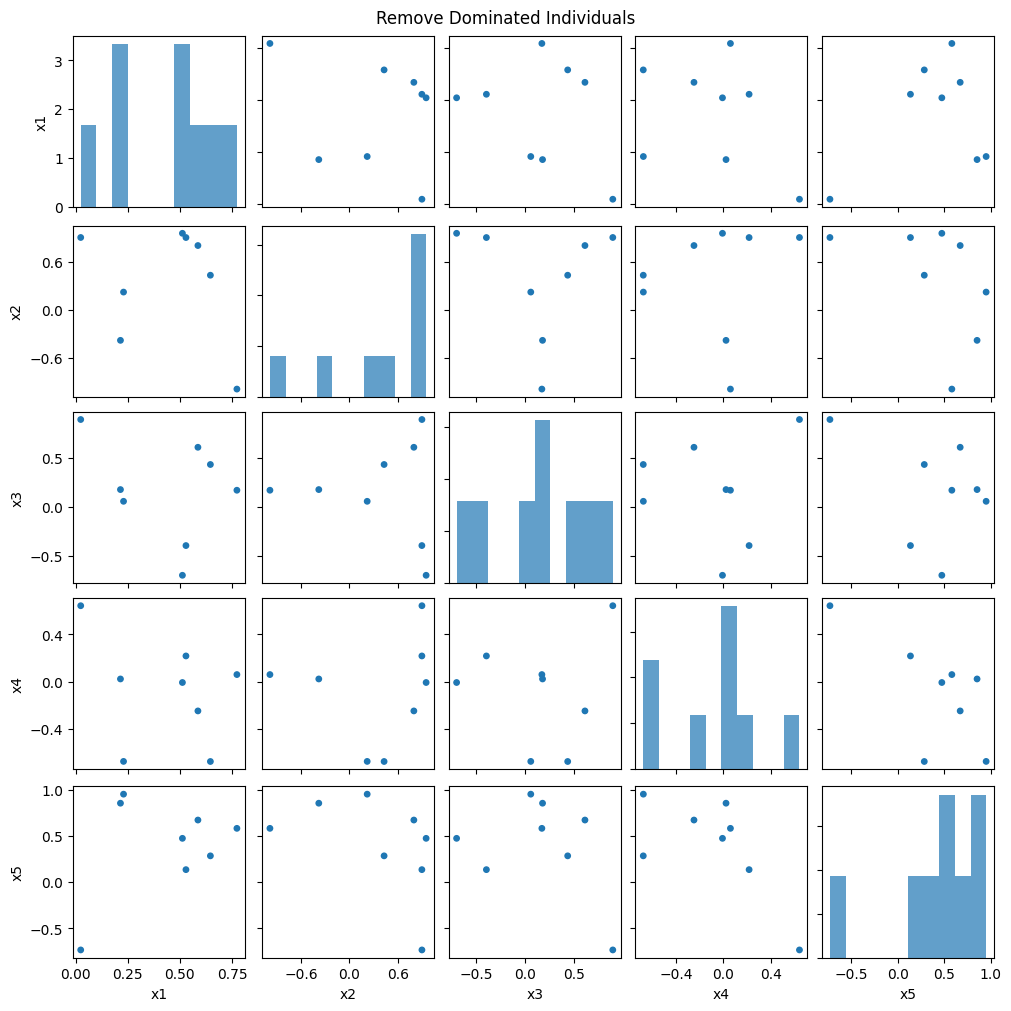

In [6]:
# Create a demo population and plot the decision variables=
last_pop = exp.runs[0].reports[-1]
fig, axes = plot_population_decision_vars(last_pop)
plt.suptitle("Last Population")

fig, axes = plot_population_decision_vars(first_pop)
plt.suptitle("First Population")

fig, axes = plot_population_decision_vars(
    first_pop, settings=PopulationDecisionVarsConfig(plot_dominated="non-dominated")
)
plt.suptitle("Remove Dominated Individuals")